<a href="https://colab.research.google.com/github/kiranavhad87/Python/blob/master/HotelBookings.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib as plt
import numpy as np
import seaborn as sns

# New Section

In [ ]:
from google.colab import files
up=files.upload()

Saving hotel_bookings.csv to hotel_bookings (2).csv


KeyboardInterrupt: ignored

In [ ]:
data=pd.read_csv('/content/hotel_bookings.csv')


In [ ]:
data=pd.read_csv('/content/drive/MyDrive/Classroom/hotel_bookings.csv')
#data2=pd.read_csv('/content/drive/MyDrive/Classroom/hotel_bookings.csv')

In [ ]:
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,7/1/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,7/1/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,7/2/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,7/2/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,7/3/2015


In [ ]:
data.info( )  

NameError: ignored

In [ ]:
data.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [ ]:
data.shape

(119390, 32)

In [ ]:
data.isna().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [ ]:
data['country']

0         PRT
1         PRT
2         GBR
3         GBR
4         GBR
         ... 
119385    BEL
119386    FRA
119387    DEU
119388    GBR
119389    DEU
Name: country, Length: 119390, dtype: object

In [ ]:
data['country'].value_counts()

PRT    48590
GBR    12129
FRA    10415
ESP     8568
DEU     7287
       ...  
SDN        1
KIR        1
BWA        1
NCL        1
VGB        1
Name: country, Length: 177, dtype: int64

In [ ]:
data['country'].mode()

0    PRT
dtype: object

In [ ]:
def fill_na(df):
  data['country'].fillna(data['country'].mode()[0],inplace=True)
fill_na(data)  
data['children'].fillna(0.0,inplace=True)
data['agent'].fillna(method='ffill',limit=5,inplace=True)
data['agent'].fillna(data['agent'].mode()[0],inplace=True)
#handling Missing Values of company data
data['company'].value_counts()
data['company'].fillna(method='ffill',inplace=True,limit=10)
data['company'].fillna(data['company'].mode()[0],inplace=True)
data['company'].isna().sum()

0

In [ ]:
data.isna().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                         

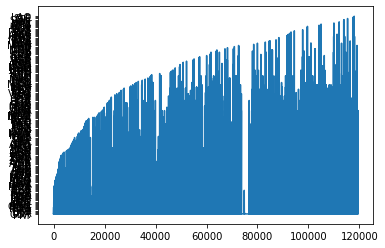

In [ ]:
plt.pyplot.plot(data['country'])

In [ ]:
data['children'].value_counts()

0.0     110796
1.0       4861
2.0       3652
3.0         76
10.0         1
Name: children, dtype: int64

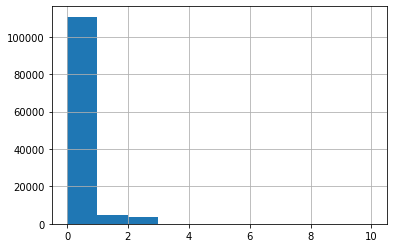

In [ ]:
data['children'].hist()

In [ ]:
data['agent']

0           NaN
1           NaN
2           NaN
3         304.0
4         240.0
          ...  
119385    394.0
119386      9.0
119387      9.0
119388     89.0
119389      9.0
Name: agent, Length: 119390, dtype: float64

In [ ]:
data['agent'].value_counts()

9.0      31961
240.0    13922
1.0       7191
14.0      3640
7.0       3539
         ...  
213.0        1
433.0        1
197.0        1
367.0        1
337.0        1
Name: agent, Length: 333, dtype: int64

In [ ]:
data['agent'].isna().sum()

16340

In [ ]:
data['agent'].isna().sum()

3384

In [ ]:
data['agent'].isna().sum()

0

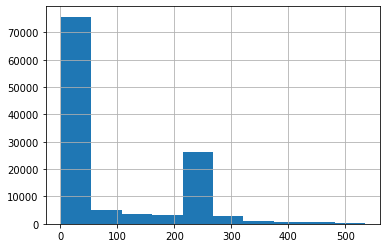

In [ ]:
data['agent'].hist()

0

In [ ]:
#data Cleaning
data[(data['adults']==0)&(data['children']==0)&(data['babies']==0)]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
2224,Resort Hotel,0,1,2015,October,41,6,0,3,0,0.0,0,SC,PRT,Corporate,Corporate,0,0,0,A,I,1,No Deposit,240.0,174.0,0,Transient-Party,0.00,0,0,Check-Out,10/6/2015
2409,Resort Hotel,0,0,2015,October,42,12,0,0,0,0.0,0,SC,PRT,Corporate,Corporate,0,0,0,A,I,0,No Deposit,240.0,174.0,0,Transient,0.00,0,0,Check-Out,10/12/2015
3181,Resort Hotel,0,36,2015,November,47,20,1,2,0,0.0,0,SC,ESP,Groups,TA/TO,0,0,0,A,C,0,No Deposit,38.0,40.0,0,Transient-Party,0.00,0,0,Check-Out,11/23/2015
3684,Resort Hotel,0,165,2015,December,53,30,1,4,0,0.0,0,SC,PRT,Groups,TA/TO,0,0,0,A,A,1,No Deposit,308.0,40.0,122,Transient-Party,0.00,0,0,Check-Out,1/4/2016
3708,Resort Hotel,0,165,2015,December,53,30,2,4,0,0.0,0,SC,PRT,Groups,TA/TO,0,0,0,A,C,1,No Deposit,308.0,40.0,122,Transient-Party,0.00,0,0,Check-Out,1/5/2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115029,City Hotel,0,107,2017,June,26,27,0,3,0,0.0,0,BB,CHE,Online TA,TA/TO,0,0,0,A,A,1,No Deposit,7.0,40.0,0,Transient,100.80,0,0,Check-Out,6/30/2017
115091,City Hotel,0,1,2017,June,26,30,0,1,0,0.0,0,SC,PRT,Complementary,Direct,0,0,0,E,K,0,No Deposit,9.0,40.0,0,Transient,0.00,1,1,Check-Out,7/1/2017
116251,City Hotel,0,44,2017,July,28,15,1,1,0,0.0,0,SC,SWE,Online TA,TA/TO,0,0,0,A,K,2,No Deposit,425.0,40.0,0,Transient,73.80,0,0,Check-Out,7/17/2017
116534,City Hotel,0,2,2017,July,28,15,2,5,0,0.0,0,SC,RUS,Online TA,TA/TO,0,0,0,A,K,1,No Deposit,9.0,40.0,0,Transient-Party,22.86,0,1,Check-Out,7/22/2017


In [ ]:
filter=(data['adults']==0)&(data['children']==0)&(data['babies']==0)
data=data[~filter]

In [ ]:
data=data[~filter]

In [ ]:
data.shape

(119210, 32)

In [ ]:
#Analyzing the Guests Country
data['country'].value_counts()

PRT    48961
GBR    12120
FRA    10401
ESP     8560
DEU     7285
       ...  
SDN        1
KIR        1
BWA        1
NCL        1
VGB        1
Name: country, Length: 177, dtype: int64

In [ ]:
data['is_canceled'].value_counts()

0    75011
1    44199
Name: is_canceled, dtype: int64

In [ ]:
country_wise_data=data[data['is_canceled']==0]['country'].value_counts().reset_index()

In [ ]:
country_wise_data.columns=['Country','no_of_guests']

In [ ]:
country_wise_data

,Country,no_of_guests
0,PRT,21398
1,GBR,9668
2,FRA,8468
3,ESP,6383
4,DEU,6067
...,...,...
160,TJK,1
161,BFA,1
162,PLW,1
163,SLE,1


In [ ]:
data[data['is_canceled']==1]['country'].value_counts()

PRT    27563
GBR     2452
ESP     2177
FRA     1933
ITA     1333
       ...  
ETH        1
MCO        1
LIE        1
SYC        1
MUS        1
Name: country, Length: 127, dtype: int64

In [ ]:
 import folium

In [ ]:
from folium.plugins import HeatMap

In [ ]:
basemap=folium.Map()

In [ ]:
import plotly.express as px

In [ ]:
px.choropleth(country_wise_data,locations=country_wise_data['Country'],color=country_wise_data['no_of_guests'],
              hover_name=country_wise_data['no_of_guests'])

In [ ]:
#How much Guests are paying for a night??
data.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [ ]:
data2=data[data['is_canceled']==0]

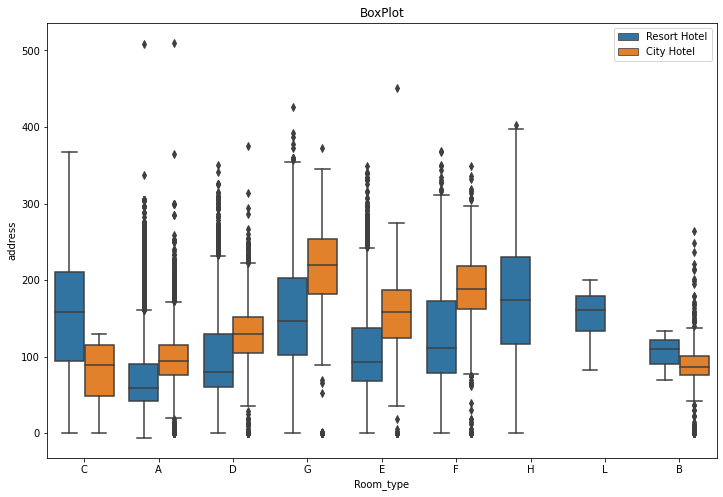

In [ ]:
plt.pyplot.figure(figsize=(12,8))

sns.boxplot(x='reserved_room_type',y='adr',data=data2,hue='hotel')
plt.pyplot.title('BoxPlot')
plt.pyplot.legend()
plt.pyplot.xlabel('Room_type')
plt.pyplot.ylabel("address")
plt.pyplot.show()

In [ ]:
#Analysing Prices of Hotel across year

RES=data[(data['is_canceled']==0)&(data['hotel']=='Resort Hotel')]
CITY=data[(data['is_canceled']==0)&(data['hotel']=='City Hotel')]

In [ ]:
RES

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,9.0,40.0,0,Transient,0.00,0,0,Check-Out,7/1/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,9.0,40.0,0,Transient,0.00,0,0,Check-Out,7/1/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,9.0,40.0,0,Transient,75.00,0,0,Check-Out,7/2/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,40.0,0,Transient,75.00,0,0,Check-Out,7/2/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,40.0,0,Transient,98.00,0,1,Check-Out,7/3/2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40055,Resort Hotel,0,212,2017,August,35,31,2,8,2,1.0,0,BB,GBR,Offline TA/TO,TA/TO,0,0,0,A,A,1,No Deposit,143.0,40.0,0,Transient,89.75,0,0,Check-Out,9/10/2017
40056,Resort Hotel,0,169,2017,August,35,30,2,9,2,0.0,0,BB,IRL,Direct,Direct,0,0,0,E,E,0,No Deposit,250.0,40.0,0,Transient-Party,202.27,0,1,Check-Out,9/10/2017
40057,Resort Hotel,0,204,2017,August,35,29,4,10,2,0.0,0,BB,IRL,Direct,Direct,0,0,0,E,E,0,No Deposit,250.0,40.0,0,Transient,153.57,0,3,Check-Out,9/12/2017
40058,Resort Hotel,0,211,2017,August,35,31,4,10,2,0.0,0,HB,GBR,Offline TA/TO,TA/TO,0,0,0,D,D,0,No Deposit,40.0,40.0,0,Contract,112.80,0,1,Check-Out,9/14/2017


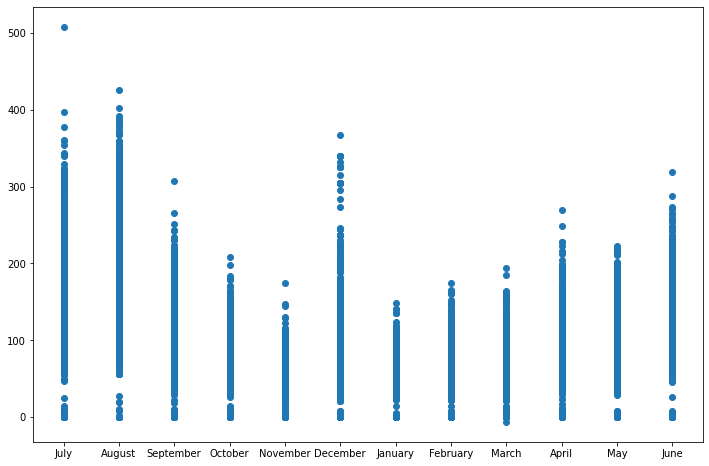

In [ ]:
plt.pyplot.figure(figsize=(12,8))
plt.pyplot.scatter(RES['arrival_date_month'],RES['adr'])

In [ ]:
RES.groupby(RES['arrival_date_month'])['adr'].mean().reset_index()

,arrival_date_month,adr
0,April,75.867816
1,August,181.205892
2,December,68.410104
3,February,54.147478
4,January,48.761125
5,July,150.122528
6,June,107.974850
7,March,57.056838
8,May,76.657558
9,November,48.706289


In [ ]:
CITY.groupby(CITY['arrival_date_month'])['adr'].mean().reset_index()

,arrival_date_month,adr
0,April,111.962267
1,August,118.674598
2,December,88.401855
3,February,86.520062
4,January,82.330983
5,July,115.818019
6,June,117.874360
7,March,90.658533
8,May,120.669827
9,November,86.946592


In [ ]:
Total_Price_change=RES.merge(CITY,how='inner',on='arrival_date_month')
Total_Price_change

In [ ]:
data.isna().sum()

In [ ]:
data_corr=data.corr()['is_canceled']

In [ ]:
plt.pyplot.figure(figsize=(20,12))
sns.heatmap(data.corr())

In [ ]:
plt.pyplot.scatter(data.corr()['is_canceled'],data.corr()['is_canceled'])

In [ ]:
data.columns

In [ ]:
data_corr.abs().sort_values(ascending=False)

In [ ]:
data.groupby('is_canceled')['reservation_status'].value_counts()

In [ ]:
list_num_cols=['arrival_date_year','arrival_date_month','arrival_date_week_number', 'booking_changes']

In [ ]:
numeric_features=[col for col in data.columns if data[col].dtype != 'O' and col not in list_num_cols]

In [ ]:
numeric_features

['is_canceled',
 'lead_time',
 'arrival_date_day_of_month',
 'stays_in_weekend_nights',
 'stays_in_week_nights',
 'adults',
 'children',
 'babies',
 'is_repeated_guest',
 'previous_cancellations',
 'previous_bookings_not_canceled',
 'agent',
 'company',
 'days_in_waiting_list',
 'adr',
 'required_car_parking_spaces',
 'total_of_special_requests']

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119210 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119210 non-null  object 
 1   is_canceled                     119210 non-null  int64  
 2   lead_time                       119210 non-null  int64  
 3   arrival_date_year               119210 non-null  int64  
 4   arrival_date_month              119210 non-null  object 
 5   arrival_date_week_number        119210 non-null  int64  
 6   arrival_date_day_of_month       119210 non-null  int64  
 7   stays_in_weekend_nights         119210 non-null  int64  
 8   stays_in_week_nights            119210 non-null  int64  
 9   adults                          119210 non-null  int64  
 10  children                        119210 non-null  float64
 11  babies                          119210 non-null  int64  
 12  meal            

In [ ]:
list_obj_cols=['assigned_room_type','reserved_room_type']


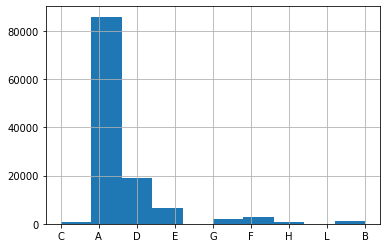

In [ ]:
data['reserved_room_type'].hist()

In [ ]:
data['assigned_room_type'].hist()

In [ ]:
data['customer_type'].hist()

In [ ]:
cat_features=[col for col in data.columns if data[col].dtype =='O' and col not in list_obj_cols]

In [ ]:
cat_features

['hotel',
 'arrival_date_month',
 'meal',
 'country',
 'market_segment',
 'distribution_channel',
 'deposit_type',
 'customer_type',
 'reservation_status',
 'reservation_status_date']

In [ ]:
numeric_features

In [ ]:
#One hot Encoding of the Object Features
#Handling Date object
data_cat=data[cat_features]
data_cat['reservation_status_date']=pd.to_datetime(data['reservation_status_date'])

data_cat['reservation_day']=data_cat['reservation_status_date'].dt.day
data_cat['reservation_month']=data_cat['reservation_status_date'].dt.month
data_cat['reservation_year']=data_cat['reservation_status_date'].dt.year

In [ ]:

data_cat

In [ ]:
import warnings
from warnings import filterwarnings
filterwarnings('ignore')

In [ ]:
#Mean Encodeing Technique
data_cat['market_segment']


In [ ]:
data_cat['market_segment'].unique()

In [ ]:
((data['market_segment']=='Direct') & (data['is_canceled']==0)).sum()

10648

In [ ]:
# Mean Encoding of the Market Segment Feature
dict=data.groupby('market_segment')['is_canceled'].mean().to_dict()

In [ ]:
data['market_segment']=data['market_segment'].map(dict)

In [ ]:
Aviation         0.221277
Complementary    0.122253
Corporate        0.187618
Direct           0.153712
Groups           0.611086
Offline TA/TO    0.343313
Online TA        0.367590
Undefined        1.000000

In [ ]:
cols=data.columns


In [ ]:
data.groupby('market_segment')['is_canceled'].mean()

market_segment
0.122253    0.122253
0.153712    0.153712
0.187618    0.187618
0.221277    0.221277
0.343313    0.343313
0.367590    0.367590
0.611086    0.611086
1.000000    1.000000
Name: is_canceled, dtype: float64

In [ ]:
data['market_segment']


0         0.153712
1         0.153712
2         0.153712
3         0.187618
4         0.367590
            ...   
119385    0.343313
119386    0.367590
119387    0.367590
119388    0.367590
119389    0.367590
Name: market_segment, Length: 119210, dtype: float64

In [ ]:
data.groupby('market_segment')["is_canceled"].mean()

market_segment
0.122253    0.122253
0.153712    0.153712
0.187618    0.187618
0.221277    0.221277
0.343313    0.343313
0.367590    0.367590
0.611086    0.611086
1.000000    1.000000
Name: is_canceled, dtype: float64

In [ ]:
data['is_canceled'].value_counts()

0    75011
1    44199
Name: is_canceled, dtype: int64

In [ ]:
((data['market_segment']=="Aviation")&(data['is_canceled']==1)).sum()

0

In [ ]:
(data['market_segment']=="Aviation").sum()

0

In [ ]:
49/138

In [ ]:
data_cat.columns

Index(['hotel', 'arrival_date_month', 'meal', 'country', 'market_segment',
       'distribution_channel', 'deposit_type', 'customer_type',
       'reservation_status', 'reservation_status_date', 'reservation_day',
       'reservation_month', 'reservation_year'],
      dtype='object')

In [ ]:
data_cat.drop('reservation_status_date',axis=1,inplace=True)

In [ ]:
data_cat['hotel'].value_counts()

City Hotel      79163
Resort Hotel    40047
Name: hotel, dtype: int64

In [ ]:
data.groupby('hotel').sum()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,market_segment,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
hotel,,,,,,,,,,,,,,,,,,,,,
City Hotel,33079,8698752,159606396,2151285,1249844,62865,172640,146838,7248.0,392,30095.903923,1977,6319,10476,14567,2186111.0,4963809.0,255814,8351949.07,1927,43301
Resort Hotel,11120,3712109,80739617,1086861,633521,47649,125289,74798,5155.0,557,14103.096076,1778,4075,5867,11516,8363095.0,3836677.0,20898,3803786.36,5530,24828


In [ ]:
data_cat

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,deposit_type,customer_type,reservation_status,reservation_day,reservation_month,reservation_year
0,Resort Hotel,July,BB,PRT,Direct,Direct,No Deposit,Transient,Check-Out,1,7,2015
1,Resort Hotel,July,BB,PRT,Direct,Direct,No Deposit,Transient,Check-Out,1,7,2015
2,Resort Hotel,July,BB,GBR,Direct,Direct,No Deposit,Transient,Check-Out,2,7,2015
3,Resort Hotel,July,BB,GBR,Corporate,Corporate,No Deposit,Transient,Check-Out,2,7,2015
4,Resort Hotel,July,BB,GBR,Online TA,TA/TO,No Deposit,Transient,Check-Out,3,7,2015
...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,August,BB,BEL,Offline TA/TO,TA/TO,No Deposit,Transient,Check-Out,6,9,2017
119386,City Hotel,August,BB,FRA,Online TA,TA/TO,No Deposit,Transient,Check-Out,7,9,2017
119387,City Hotel,August,BB,DEU,Online TA,TA/TO,No Deposit,Transient,Check-Out,7,9,2017
119388,City Hotel,August,BB,GBR,Online TA,TA/TO,No Deposit,Transient,Check-Out,7,9,2017


In [ ]:
data_cat.groupby('hotel').sum()

,reservation_day,reservation_month,reservation_year
hotel,,,
City Hotel,1232103,502478,159600091
Resort Hotel,635474,252554,80738421


In [ ]:
#encoding of the hotel Feature
data_cat_hotel=pd.get_dummies(data_cat['hotel'],prefix='hotel',drop_first=True)
data_cat_hotel
data_cat['hotel']=data_cat_hotel
data_cat['hotel']
data['hotel']=data_cat['hotel']

In [ ]:
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,1,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,0.153712,Direct,0,0,0,C,C,3,No Deposit,9.0,40.0,0,Transient,0.0,0,0,Check-Out,7/1/2015
1,1,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,0.153712,Direct,0,0,0,C,C,4,No Deposit,9.0,40.0,0,Transient,0.0,0,0,Check-Out,7/1/2015
2,1,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,0.153712,Direct,0,0,0,A,C,0,No Deposit,9.0,40.0,0,Transient,75.0,0,0,Check-Out,7/2/2015
3,1,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,0.187618,Corporate,0,0,0,A,A,0,No Deposit,304.0,40.0,0,Transient,75.0,0,0,Check-Out,7/2/2015
4,1,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,0.367590,TA/TO,0,0,0,A,A,0,No Deposit,240.0,40.0,0,Transient,98.0,0,1,Check-Out,7/3/2015


In [ ]:
data['meal'].value_counts()

BB           92236
HB           14458
SC           10549
Undefined     1169
FB             798
Name: meal, dtype: int64

In [ ]:
#Mean encoding of the meal feature
dict=data.groupby('meal')['is_canceled'].mean().to_dict()
data['meal']=data['meal'].map(dict)
data['meal']

0         0.374106
1         0.374106
2         0.374106
3         0.374106
4         0.374106
            ...   
119385    0.374106
119386    0.374106
119387    0.374106
119388    0.374106
119389    0.344653
Name: meal, Length: 119210, dtype: float64

In [ ]:
#Mean Encoding of the contry feature
dict=data.groupby('country')['is_canceled'].mean().to_dict()
data['country']=data['country'].map(dict)
data['country']

0         0.562958
1         0.562958
2         0.202310
3         0.202310
4         0.202310
            ...   
119385    0.202391
119386    0.185848
119387    0.167193
119388    0.202310
119389    0.167193
Name: country, Length: 119210, dtype: float64

In [ ]:
data.head()

In [ ]:
data['distribution_channel'].value_counts()

TA/TO        97750
Direct       14611
Corporate     6651
GDS            193
Undefined        5
Name: distribution_channel, dtype: int64

In [ ]:
#Mean Encoding of the 'distribution_channel'
dict=data.groupby('distribution_channel')['is_canceled'].mean().to_dict()
data['distribution_channel']=data['distribution_channel'].map(dict)
data['distribution_channel']

0         0.174868
1         0.174868
2         0.174868
3         0.220568
4         0.410598
            ...   
119385    0.410598
119386    0.410598
119387    0.410598
119388    0.410598
119389    0.410598
Name: distribution_channel, Length: 119210, dtype: float64

In [ ]:
#Mean Encoding of the 'customer_type'
dict=data.groupby('customer_type')['is_canceled'].mean().to_dict()
data['customer_type']=data['customer_type'].map(dict)
data['customer_type']

0         0.407864
1         0.407864
2         0.407864
3         0.407864
4         0.407864
            ...   
119385    0.407864
119386    0.407864
119387    0.407864
119388    0.407864
119389    0.407864
Name: customer_type, Length: 119210, dtype: float64

In [ ]:
data['reservation_status'].value_counts()

Check-Out    75011
Canceled     42993
No-Show       1206
Name: reservation_status, dtype: int64

In [ ]:
#Encoding of the reservation_status
data_res=pd.get_dummies(data['reservation_status'],prefix='Res_sta',drop_first=True)
pd.concat([data,data_res],axis=1)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,Res_sta_Check-Out,Res_sta_No-Show
0,1,0,342,2015,July,27,1,0,0,2,0.0,0,0.374106,0.562958,0.153712,0.174868,0,0,0,C,C,3,No Deposit,9.0,40.0,0,0.407864,0.00,0,0,Check-Out,7/1/2015,1,0
1,1,0,737,2015,July,27,1,0,0,2,0.0,0,0.374106,0.562958,0.153712,0.174868,0,0,0,C,C,4,No Deposit,9.0,40.0,0,0.407864,0.00,0,0,Check-Out,7/1/2015,1,0
2,1,0,7,2015,July,27,1,0,1,1,0.0,0,0.374106,0.202310,0.153712,0.174868,0,0,0,A,C,0,No Deposit,9.0,40.0,0,0.407864,75.00,0,0,Check-Out,7/2/2015,1,0
3,1,0,13,2015,July,27,1,0,1,1,0.0,0,0.374106,0.202310,0.187618,0.220568,0,0,0,A,A,0,No Deposit,304.0,40.0,0,0.407864,75.00,0,0,Check-Out,7/2/2015,1,0
4,1,0,14,2015,July,27,1,0,2,2,0.0,0,0.374106,0.202310,0.367590,0.410598,0,0,0,A,A,0,No Deposit,240.0,40.0,0,0.407864,98.00,0,1,Check-Out,7/3/2015,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,0,0,23,2017,August,35,30,2,5,2,0.0,0,0.374106,0.202391,0.343313,0.410598,0,0,0,A,A,0,No Deposit,394.0,40.0,0,0.407864,96.14,0,0,Check-Out,9/6/2017,1,0
119386,0,0,102,2017,August,35,31,2,5,3,0.0,0,0.374106,0.185848,0.367590,0.410598,0,0,0,E,E,0,No Deposit,9.0,40.0,0,0.407864,225.43,0,2,Check-Out,9/7/2017,1,0
119387,0,0,34,2017,August,35,31,2,5,2,0.0,0,0.374106,0.167193,0.367590,0.410598,0,0,0,D,D,0,No Deposit,9.0,40.0,0,0.407864,157.71,0,4,Check-Out,9/7/2017,1,0
119388,0,0,109,2017,August,35,31,2,5,2,0.0,0,0.374106,0.202310,0.367590,0.410598,0,0,0,A,A,0,No Deposit,89.0,40.0,0,0.407864,104.40,0,0,Check-Out,9/7/2017,1,0


In [ ]:
data.drop(['arrival_date_month','country','reserved_room_type','assigned_room_type','deposit_type',
           'reservation_status','reservation_status_date'],axis=1,inplace=True)

In [ ]:
data.describe()

In [ ]:
##

Handling **Outliers**

In [ ]:
#adr Column
sns.displot(data['adr'],kind='kde')

In [ ]:
sns.distplot(np.log1p(data['adr']))

In [ ]:
def handling_outlires(col):
  data[col]=np.log1p(data[col])


In [ ]:
handling_outlires('adr')

In [ ]:
sns.distplot(data['adr'])

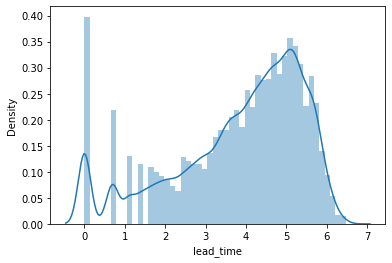

In [ ]:
handling_outlires('lead_time')
sns.distplot(data['lead_time'])

In [ ]:
data.info()

In [ ]:
sns.distplot(data['stays_in_weekend_nights'])

In [ ]:
(data['stays_in_weekend_nights']>8).sum()

29

In [ ]:
sns.distplot(data['babies'])

In [ ]:
data['is_repeated_guest'].value_counts()

0    115455
1      3755
Name: is_repeated_guest, dtype: int64

In [ ]:
data.isna().sum()

In [ ]:
data.dropna(inplace=True)

## Selection of the Important Features

Sagrigating the Input and Output feaures

In [1]:
x=data['is_canceled']


NameError: ignored

In [ ]:
data.drop('is_canceled',inplace=True,axis=1)


In [ ]:
y=data
y

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

In [ ]:
feature_sel=SelectFromModel(Lasso(alpha=0.005,random_state=0))

In [ ]:
feature_sel.fit(y,x)

In [ ]:
feature_sel.get_support()

In [ ]:
col=y.columns
col

In [ ]:
selected_feature=col[feature_sel.get_support()]

In [ ]:
y=y[selected_feature]

## Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(y,x,random_state=0,test_size=0.25)

In [ ]:
x_train.shape,x_test.shape,y_test.shape,y_train.shape

((89406, 18), (29803, 18), (29803,), (89406,))

In [ ]:
model=LogisticRegression(random_state=0)

In [ ]:
model.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
model.score(x_train,y_train)

0.6972798246202716

In [ ]:
model.score(x_test,y_test)

0.6956346676509076

In [ ]:
model.fit(y,x)

In [ ]:
Y_pred=model.pre

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train,)

ValueError: ignored